In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch, torchvision
from torch.autograd import Variable
import torch.nn as nn 
%matplotlib inline

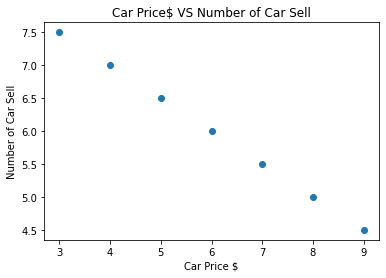

In [20]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

# How To

## Change the Data to torch tensors. If need be, change it to Variables too ---***Make Sure to Explicitly define the data type when changing to np array***---

In [38]:
# We want to pass in a tensor of all the car prices. So lets change the car prices array into a tensor/vector.
np_vec = np.array(car_prices_array, dtype=np.float32).reshape(-1,1)
torch_vec = torch.from_numpy(np_vec)

#Since we need to calculate and deal with gradients, we turn the tensor into a variable as well. 
car_prices = Variable(torch_vec)
car_prices

tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [41]:
actual_number_of_cars_sold = Variable(torch.from_numpy(np.array(number_of_car_sell_array, dtype=np.float32).reshape(-1,1)))
actual_number_of_cars_sold

tensor([[7.5000],
        [7.0000],
        [6.5000],
        [6.0000],
        [5.5000],
        [5.0000],
        [4.5000]])

## Define the Model

In [13]:
# Pytorch model template
class ModelName(nn.Module):
    def __init__(self, input_size, output_size):
        super(ModelName, self).__init__()
        # define the layers in the model 
        
    def forward(self, x):
        # determine how input moves thru the different layers 
        # return final output
        return x

In [28]:
class CarModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(CarModel, self).__init__()
        self.linear_layer = nn.Linear(1,1)
        
        
    def forward(self, x):
        result = self.linear_layer(x)
        return result

In [29]:
# Define the model
input_size = 1
output_size = 1
carModel = CarModel(input_size, output_size)

In [30]:
# Define loss function, learning rate, and optimization function
loss_fxn = nn.MSELoss()
learning_rate = 0.02 
opt_fxn = torch.optim.SGD(carModel.parameters(), learning_rate)

## Train the Model

In [51]:
def print_info(i, loss_num, multiple):
    if(i % multiple == 0):
        print(f"Iteration: {i} Loss: {loss_num}", )

In [54]:
num_of_iterations = 1000
loss_list = []

for i in range(num_of_iterations):
    opt_fxn.zero_grad() #Clear out previosly calculated gradient changes from opt
    predicted_num_cars_sold = carModel(car_prices) #predict 
    loss = loss_fxn(predicted_num_cars_sold, actual_number_of_cars_sold) #calculate loss
    loss.backward() #get how much we need to change weights given the loss
    opt_fxn.step() #implement the changes
    loss_list.append(loss.data) #for graph
    print_info(i, loss.data, 100)

Iteration: 0 Loss: 1.4395395517349243
Iteration: 100 Loss: 0.6573327779769897
Iteration: 200 Loss: 0.3001566529273987
Iteration: 300 Loss: 0.13705989718437195
Iteration: 400 Loss: 0.06258555501699448
Iteration: 500 Loss: 0.028578367084264755
Iteration: 600 Loss: 0.013049629516899586
Iteration: 700 Loss: 0.005958777852356434
Iteration: 800 Loss: 0.0027209410909563303
Iteration: 900 Loss: 0.0012425165623426437


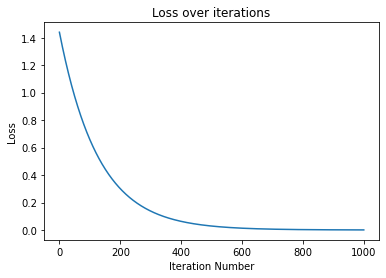

In [55]:
plt.plot(range(num_of_iterations), loss_list)
plt.title("Loss over iterations")
plt.xlabel("Iteration Number")
plt.ylabel("Loss")
plt.show()

In [59]:
predictions = carModel(car_prices).data.numpy()

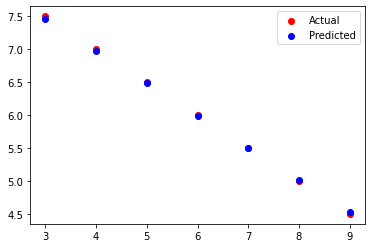

In [65]:
plt.scatter(car_prices_array, number_of_car_sell_array, label="Actual", color="red")
plt.scatter(car_prices_array, predictions, label="Predicted", color="blue")
plt.legend()
plt.show()